In [ ]:
import sys, os
print('Python version:  ', sys.version)
print('Active Conda Environment: ', os.getenv('CONDA_DEFAULT_ENV'))

Python version:   3.11.11 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:34:19) [MSC v.1929 64 bit (AMD64)]
Active Conda Environment:  py311


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt

data = pd.DataFrame()
rank_data = pd.read_csv(r'../data/conjoint_bike.csv')
rank_data.head(3)

,Rank,gear,type,susp,guards
0,1,Has_gears,Mountain_bike,Suspension,Mudguards
1,2,No_gears,Mountain_bike,Suspension,Mudguards
2,3,Has_gears,Racing_bike,Suspension,Mudguards


In [ ]:
rank_data.shape

(16, 5)

In [ ]:
#list(conjoint_data.columns)

In [ ]:
#introduce dummy variables
conjoint_data = pd.get_dummies(rank_data,columns =['gear','type','susp','guards'], dtype=float)

conjoint_data = conjoint_data.drop(['gear_No_gears', 'type_Mountain_bike',  'susp_No_Suspension', 'guards_No_mudguards'], axis=1)

cols = list(conjoint_data.columns)
conjoint_data.head()

,Rank,gear_Has_gears,type_Racing_bike,susp_Suspension,guards_Mudguards
0,1,1.0,0.0,1.0,1.0
1,2,0.0,0.0,1.0,1.0
2,3,1.0,1.0,1.0,1.0
3,4,0.0,1.0,1.0,1.0
4,5,1.0,0.0,0.0,1.0


In [ ]:
conjoint_data['Rank'] = 11- conjoint_data['Rank']  ## important - value of rank must reflect preference

In [ ]:
conjoint_data.head()

,Rank,gear_Has_gears,type_Racing_bike,susp_Suspension,guards_Mudguards
0,10,1.0,0.0,1.0,1.0
1,9,0.0,0.0,1.0,1.0
2,8,1.0,1.0,1.0,1.0
3,7,0.0,1.0,1.0,1.0
4,6,1.0,0.0,0.0,1.0


In [ ]:
y = conjoint_data['Rank']
X = conjoint_data.drop('Rank', axis=1)
X['const'] = 1

linearRegression = sm.OLS(y, X).fit()
linearRegression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.9380
Date:                Sun, 30 Nov 2025   Prob (F-statistic):              0.477
Time:                        19:02:19   Log-Likelihood:                -36.134
No. Observations:                  16   AIC:                             82.27
Df Residuals:                      11   BIC:                             86.13
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
gear_Has_gears       0.7500      1.396      0.537      0.602      -2.323       3.823
type_Racing_bike    -0.5000      1.396     -0.358      0.727      -3.573       2.573
susp_Suspension      2.5000      1.396      1.791      0.101      -0.573       5.573
guards_Mudguards    -0.5000      1.396     -0.358      0.727      -3.573       2.573
const                5.1250      1.561      3.284      0.007       1.690       8.560
==============================================================================
Omnibus:                        3.357   Durbin-Watson:                   0.740
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                2.586
Skew:                          -0.933   Prob(JB):                        0.274
Kurtosis:                       2.371   Cond. No.                         4.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLS Regression Results Explanation

Let's break down the `OLS Regression Results` table section by section:

**1. Model Summary (Top Section):**

*   **Dep. Variable: `Rank`**: This indicates that `Rank` is the dependent variable, meaning it's the variable we are trying to predict or explain.

*   **R-squared: `0.254`**: This is the coefficient of determination. It represents the proportion of the variance in the dependent variable (`Rank`) that is predictable from the independent variables. An R-squared of 0.254 means that approximately 25.4% of the variability in the `Rank` can be explained by the features (`gear_Has_gears`, `type_Racing_bike`, `susp_Suspension`, `guards_Mudguards`). This is a relatively low value, suggesting that the model doesn't explain a large portion of the variance.

*   **Adj. R-squared: `-0.017`**: The adjusted R-squared accounts for the number of predictors in the model. It generally provides a more accurate measure when comparing models with different numbers of predictors. A negative adjusted R-squared indicates that the model is performing worse than a model with no predictors, suggesting that the added predictors do not improve the model's explanatory power, or may even be detrimental.

*   **Model: `OLS`**: Stands for Ordinary Least Squares, which is the method used to estimate the coefficients of the linear regression equation.

*   **Method: `Least Squares`**: Confirms the use of the least squares method to fit the regression line.

*   **Date & Time**: Provides the date and time when the model was run.

*   **No. Observations: `16`**: This is the number of data points or samples used to fit the model.

*   **Df Residuals: `11`**: Degrees of freedom of the residuals. It's calculated as `No. Observations - Df Model - 1` (16 - 4 - 1 = 11).

*   **Df Model: `4`**: Degrees of freedom for the model. This is the number of independent variables (predictors) in the model.

*   **F-statistic: `0.9380`**: This statistic is used to test the overall significance of the regression model. It tests the null hypothesis that all the regression coefficients are equal to zero (i.e., that none of the independent variables have a statistically significant relationship with the dependent variable).

*   **Prob (F-statistic): `0.477`**: This is the p-value associated with the F-statistic. A high p-value (typically > 0.05) suggests that the overall model is not statistically significant. In this case, 0.477 is much higher than 0.05, indicating that we cannot reject the null hypothesis, meaning the overall model is not statistically significant in explaining the `Rank`.

*   **Log-Likelihood: `-36.134`**: A measure of how well the model fits the data. Higher (less negative) values indicate a better fit.

*   **AIC: `82.27`** (Akaike Information Criterion) & **BIC: `86.13`** (Bayesian Information Criterion): These are measures used for model comparison. Lower AIC and BIC values generally indicate a better model, especially when comparing non-nested models or models with different numbers of parameters. They penalize models for having more parameters to avoid overfitting.

*   **Covariance Type: `nonrobust`**: Indicates that standard errors are calculated assuming homoscedasticity (constant variance of errors).

**2. Coefficients Section:**

This section provides details for each independent variable (predictor) in the model:

*   **`coef` (Coefficient)**: This is the estimated effect of a one-unit change in the independent variable on the dependent variable, holding all other variables constant.
    *   `gear_Has_gears`: A coefficient of `0.7500` means that a bike having gears (compared to the baseline `No_gears`) is associated with an increase of `0.75` in the `Rank` (preference), all else being equal.
    *   `type_Racing_bike`: A coefficient of `-0.5000` means that a racing bike (compared to the baseline `Mountain_bike`) is associated with a decrease of `0.50` in the `Rank`.
    *   `susp_Suspension`: A coefficient of `2.5000` means that a bike with suspension (compared to the baseline `No_Suspension`) is associated with a significant increase of `2.50` in the `Rank`.
    *   `guards_Mudguards`: A coefficient of `-0.5000` means that a bike with mudguards (compared to the baseline `No_mudguards`) is associated with a decrease of `0.50` in the `Rank`.
    *   `const` (Constant/Intercept): The intercept `5.1250` represents the expected `Rank` when all other independent variables are zero (i.e., for a bike with `No_gears`, `Mountain_bike`, `No_Suspension`, `No_mudguards`).

*   **`std err` (Standard Error)**: This measures the accuracy of the coefficient estimates. A smaller standard error indicates a more precise estimate.

*   **`t` (t-statistic)**: This is the coefficient divided by its standard error. It's used to test the hypothesis that the true coefficient is zero.

*   **`P>|t|` (p-value)**: This is the probability of observing a t-statistic as extreme as, or more extreme than, the calculated one, assuming the null hypothesis (coefficient is zero) is true. A low p-value (typically < 0.05) indicates that the variable is statistically significant.
    *   `gear_Has_gears`: `0.602` (not significant)
    *   `type_Racing_bike`: `0.727` (not significant)
    *   `susp_Suspension`: `0.101` (not significant at the 0.05 level, but close to significant at a 0.10 level - suggesting some impact)
    *   `guards_Mudguards`: `0.727` (not significant)
    *   `const`: `0.007` (statistically significant)

    *Interpretation:* Only the `const` (intercept) is statistically significant at the 0.05 level. The `susp_Suspension` variable is close to being significant at the 0.10 level, suggesting it might have some impact, but not a strong one given the overall model's poor performance.

*   **`[0.025 0.975]` (95% Confidence Interval)**: This range indicates that if you were to repeat the sampling and modeling process many times, 95% of the calculated confidence intervals would contain the true population coefficient. If the interval includes zero, it suggests that the variable is not statistically significant (which aligns with the p-values above).

**3. Diagnostic Statistics (Bottom Section):**

These statistics help assess the assumptions of the OLS model and identify potential problems:

*   **Omnibus: `3.357` & Prob(Omnibus): `0.187`**: The Omnibus test checks for the normality of residuals (errors). A low p-value (< 0.05) would suggest that residuals are not normally distributed. Here, `0.187` is high, so we cannot reject the null hypothesis of normal residuals.

*   **Durbin-Watson: `0.740`**: This statistic tests for autocorrelation (correlation between consecutive residuals). A value close to 2 suggests no autocorrelation. Values significantly below 2 (like `0.740`) can indicate positive autocorrelation, meaning residuals are positively correlated with their previous values. This violates an OLS assumption and can lead to underestimated standard errors.

*   **Jarque-Bera (JB): `2.586` & Prob(JB): `0.274`**: Another test for normality of residuals, specifically for skewness and kurtosis. A high p-value (`0.274`) indicates that we cannot reject the null hypothesis that residuals are normally distributed.

*   **Skew: `-0.933`**: Measures the asymmetry of the residual distribution. A value of 0 indicates perfect symmetry. Negative skew means the tail of the distribution is longer on the left side.

*   **Kurtosis: `2.371`**: Measures the

peakedness

of the residual distribution relative to a normal distribution. A normal distribution has a kurtosis of 3. Values less than 3 indicate a flatter distribution (platykurtic), and values greater than 3 indicate a more peaked distribution (leptokurtic).

*   **Cond. No. `4.27`**: This is the condition number. High values (generally > 30) can indicate multicollinearity, where independent variables are highly correlated with each other. Here, `4.27` is low, suggesting that multicollinearity is not a significant issue.

**Notes:**

*   **`[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.`**: This note reminds us of the assumption made when calculating the standard errors and p-values. If this assumption (homoscedasticity) is violated, the standard errors might be unreliable.

**Summary of the model's performance:**

Based on these results, the linear regression model built to predict `Rank` from the given features is not very strong. The low R-squared, negative adjusted R-squared, and especially the high `Prob (F-statistic)` indicate that the model, as a whole, does not significantly explain the variation in `Rank`. While the `const` is significant, none of the individual attribute coefficients are statistically significant at the conventional 0.05 level (though `susp_Suspension` is close at 0.10), meaning we cannot confidently say that these attributes have a statistically significant linear relationship with the `Rank`. The Durbin-Watson statistic also suggests potential positive autocorrelation in the residuals, which could indicate that some time-series or ordering effect is not captured by the model.

In [ ]:
lp = linearRegression.params
pars = pd.DataFrame({'var':lp.index, 'coeft':lp.values})
pars

,var,coeft
0,gear_Has_gears,0.750
1,type_Racing_bike,-0.500
2,susp_Suspension,2.500
3,guards_Mudguards,-0.500
4,const,5.125


In [ ]:
df2 = pd.get_dummies(rank_data.loc[:,
        ['gear','type','susp','guards']], columns =['gear','type','susp','guards'], dtype=float)
cols = list(df2.columns)

df3 = pd.DataFrame()
df3['var'] = cols

In [ ]:
df3 = df3.merge(pars, on='var', how='left')
df3=df3.fillna(0)

In [ ]:
df3['attrib']= df3["var"].str.split("_", n = 1, expand=True)[0]
df3['factors']= df3["var"].str.split("_", n = 1, expand=True)[1]

In [ ]:
df3

,var,coeft,attrib,factors
0,gear_Has_gears,0.75,gear,Has_gears
1,gear_No_gears,0.00,gear,No_gears
2,type_Mountain_bike,0.00,type,Mountain_bike
3,type_Racing_bike,-0.50,type,Racing_bike
4,susp_No_Suspension,0.00,susp,No_Suspension
5,susp_Suspension,2.50,susp,Suspension
6,guards_Mudguards,-0.50,guards,Mudguards
7,guards_No_mudguards,0.00,guards,No_mudguards


In [ ]:
attrib = df3.groupby('attrib')['coeft'].agg(['min', 'max'])
attrib['imp'] = attrib['max'] - attrib['min']
attrib['imp%'] = attrib['imp']*100/(attrib['imp'].sum())
attrib = attrib.sort_values(['imp%'],ascending=False)
attrib

,min,max,imp,imp%
attrib,,,,
susp,0.0,2.50,2.50,58.823529
gear,0.0,0.75,0.75,17.647059
type,-0.5,0.00,0.50,11.764706
guards,-0.5,0.00,0.50,11.764706


<Axes: xlabel='attrib'>

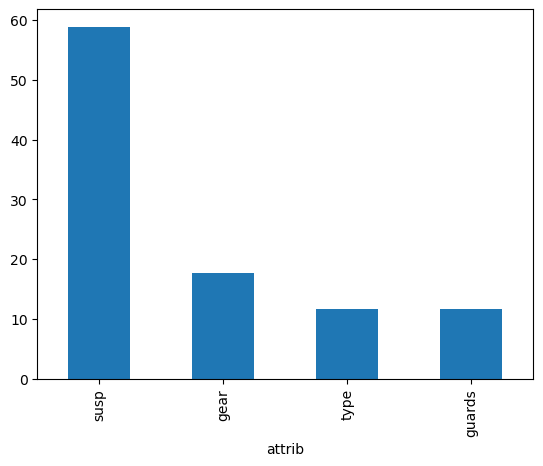

In [ ]:
attrib['imp%'].plot.bar()

In [ ]:
list1 = ['Has_gears', 'No_gears']
list2 = ['Mountain_bike', 'Racing_bike']
list3 = ['Suspension', 'No_Suspension']
list4 = ['Mudguards', 'No_mudguards']

factors = [[i, j, k, l] for i in list1
                 for j in list2
                 for k in list3
                 for l in list4]

In [ ]:
df = pd.DataFrame(factors, columns =['gear','type','susp','guards'])
df

,gear,type,susp,guards
0,Has_gears,Mountain_bike,Suspension,Mudguards
1,Has_gears,Mountain_bike,Suspension,No_mudguards
2,Has_gears,Mountain_bike,No_Suspension,Mudguards
3,Has_gears,Mountain_bike,No_Suspension,No_mudguards
4,Has_gears,Racing_bike,Suspension,Mudguards
5,Has_gears,Racing_bike,Suspension,No_mudguards
6,Has_gears,Racing_bike,No_Suspension,Mudguards
7,Has_gears,Racing_bike,No_Suspension,No_mudguards
8,No_gears,Mountain_bike,Suspension,Mudguards
9,No_gears,Mountain_bike,Suspension,No_mudguards


In [ ]:
df4 = df3.loc[:, ['factors', 'coeft']]

for fs in ['gear','type','susp','guards']:
    #df2 = df[[fs]]
    df5 = df4.rename(columns = {'coeft': str('coef_'+fs),'factors':fs})
    df = df.merge(df5, on=fs)

print(df)

         gear           type           susp        guards  coef_gear  \
0   Has_gears  Mountain_bike     Suspension     Mudguards       0.75   
1   Has_gears  Mountain_bike     Suspension  No_mudguards       0.75   
2   Has_gears  Mountain_bike  No_Suspension     Mudguards       0.75   
3   Has_gears  Mountain_bike  No_Suspension  No_mudguards       0.75   
4   Has_gears    Racing_bike     Suspension     Mudguards       0.75   
5   Has_gears    Racing_bike     Suspension  No_mudguards       0.75   
6   Has_gears    Racing_bike  No_Suspension     Mudguards       0.75   
7   Has_gears    Racing_bike  No_Suspension  No_mudguards       0.75   
8    No_gears  Mountain_bike     Suspension     Mudguards       0.00   
9    No_gears  Mountain_bike     Suspension  No_mudguards       0.00   
10   No_gears  Mountain_bike  No_Suspension     Mudguards       0.00   
11   No_gears  Mountain_bike  No_Suspension  No_mudguards       0.00   
12   No_gears    Racing_bike     Suspension     Mudguards       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gear         16 non-null     object 
 1   type         16 non-null     object 
 2   susp         16 non-null     object 
 3   guards       16 non-null     object 
 4   coef_gear    16 non-null     float64
 5   coef_type    16 non-null     float64
 6   coef_susp    16 non-null     float64
 7   coef_guards  16 non-null     float64
dtypes: float64(4), object(4)
memory usage: 1.1+ KB


In [ ]:
df['Tot_utils'] = df.loc[:,['coef_gear', 'coef_type', 'coef_susp', 'coef_guards']].sum(axis=1)
df['exp_tot_util'] = np.exp(df['Tot_utils'])
Tot_Exp_Util = df['exp_tot_util'].sum()
df['Mkt Share'] = df['exp_tot_util'] /Tot_Exp_Util

In [ ]:
df = df.sort_values('Tot_utils', ascending=False)

In [ ]:
df

,gear,type,susp,guards,coef_gear,coef_type,coef_susp,coef_guards,Tot_utils,exp_tot_util,Mkt Share
1,Has_gears,Mountain_bike,Suspension,No_mudguards,0.75,0.0,2.5,0.0,3.25,25.790340,0.243189
0,Has_gears,Mountain_bike,Suspension,Mudguards,0.75,0.0,2.5,-0.5,2.75,15.642632,0.147502
5,Has_gears,Racing_bike,Suspension,No_mudguards,0.75,-0.5,2.5,0.0,2.75,15.642632,0.147502
9,No_gears,Mountain_bike,Suspension,No_mudguards,0.00,0.0,2.5,0.0,2.50,12.182494,0.114875
4,Has_gears,Racing_bike,Suspension,Mudguards,0.75,-0.5,2.5,-0.5,2.25,9.487736,0.089464
8,No_gears,Mountain_bike,Suspension,Mudguards,0.00,0.0,2.5,-0.5,2.00,7.389056,0.069675
13,No_gears,Racing_bike,Suspension,No_mudguards,0.00,-0.5,2.5,0.0,2.00,7.389056,0.069675
12,No_gears,Racing_bike,Suspension,Mudguards,0.00,-0.5,2.5,-0.5,1.50,4.481689,0.042260
3,Has_gears,Mountain_bike,No_Suspension,No_mudguards,0.75,0.0,0.0,0.0,0.75,2.117000,0.019962
2,Has_gears,Mountain_bike,No_Suspension,Mudguards,0.75,0.0,0.0,-0.5,0.25,1.284025,0.012108


In [ ]:
utility_scores = df['Tot_utils'].values
utility_scores

array([ 3.25,  2.75,  2.75,  2.5 ,  2.25,  2.  ,  2.  ,  1.5 ,  0.75,
        0.25,  0.25,  0.  , -0.25, -0.5 , -0.5 , -1.  ])

In [ ]:
total_utility=0
c= 0.833

for item in utility_scores:
    total_utility = total_utility + np.exp(c*item)

for item in utility_scores:
    probabilty = np.exp(c*item)/total_utility
    itemindex = np.where(utility_scores==item)

    print ('Market share of profile %s is %s ' % (itemindex,probabilty*100))

Market share of profile (array([0], dtype=int64),) is 21.03286330709188 
Market share of profile (array([1], dtype=int64),) is 13.868029207087435 
Market share of profile (array([2], dtype=int64),) is 13.868029207087396 
Market share of profile (array([3], dtype=int64),) is 11.260895331557883 
Market share of profile (array([4], dtype=int64),) is 9.143892169155222 
Market share of profile (array([5], dtype=int64),) is 7.424877111398474 
Market share of profile (array([6], dtype=int64),) is 7.4248771113984535 
Market share of profile (array([7], dtype=int64),) is 4.8955965308437 
Market share of profile (array([8], dtype=int64),) is 2.621079180445221 
Market share of profile (array([9], dtype=int64),) is 1.7282099017040098 
Market share of profile (array([10], dtype=int64),) is 1.728209901704005 
Market share of profile (array([11], dtype=int64),) is 1.4033133708793244 
Market share of profile (array([12], dtype=int64),) is 1.1394960849066935 
Market share of profile (array([13], dtype=